<a href="https://colab.research.google.com/github/alikesha/Fraud-Detection-of-Ethereum/blob/main/Fruad_Detection_Of_ETHEREUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
    <h1 align="center">Fruad Detection In Transactions Of ETHEREUM</h1>
    <h3 align="center">Dataset is from Kaggle.com</h3>
    <h4 align="center">Ali Keshavarz</h5>
</div>




##Installing CatBoost


In [ ]:
pip install catboost

##Restart The Kernel After Installing PyCaret To Avoid Errors

In [ ]:
pip install --pre pycaret -q

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# from catboost import Pool, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report


##Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data Source
# df = pd.read_csv('https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset' , index_col=0)

df = pd.read_csv('/content/drive/MyDrive/transaction_dataset.csv' , index_col=0)
df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

In [ ]:
df.shape

(9841, 50)

In [ ]:
df = df.drop(['Index' , 'Address'] , axis = 1)
df.sample()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7383,0,1.24,0.68,5.08,3,2,0,2,3,423.371616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


##Using AutoML For Better Sight

In [ ]:
from pycaret.classification import *

In [ ]:
setup(df , target = 'FLAG' , session_id = 45)

,Description,Value
0,Session id,45
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 17)"
4,Transformed data shape,"(9841, 17)"
5,Transformed train set shape,"(6888, 17)"
6,Transformed test set shape,"(2953, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9804,0.9972,0.9384,0.9723,0.9548,0.9423,0.9427,0.6720
catboost,CatBoost Classifier,0.9801,0.9976,0.9331,0.9760,0.9540,0.9413,0.9418,8.3750
xgboost,Extreme Gradient Boosting,0.9798,0.9971,0.9364,0.9714,0.9535,0.9406,0.9409,0.2670
rf,Random Forest Classifier,0.9740,0.9949,0.9121,0.9687,0.9395,0.9229,0.9237,1.3300
gbc,Gradient Boosting Classifier,0.9714,0.9951,0.9095,0.9594,0.9336,0.9154,0.9161,1.9380
et,Extra Trees Classifier,0.9665,0.9930,0.8892,0.9563,0.9214,0.9001,0.9012,0.7330
dt,Decision Tree Classifier,0.9589,0.9398,0.9056,0.9088,0.9069,0.8806,0.8808,0.0850
ada,Ada Boost Classifier,0.9572,0.9859,0.8964,0.9091,0.9026,0.8752,0.8753,0.7040
knn,K Neighbors Classifier,0.8891,0.9015,0.7122,0.7709,0.7394,0.6692,0.6707,0.1300
lr,Logistic Regression,0.8323,0.7872,0.2453,0.9908,0.3921,0.3340,0.4453,1.0590


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
for col in df:
  print(f"{col} : {len(df[col].unique())}")

###We're dealing with a highly imbalance with 22% fraudlent instances.

In [ ]:
df['FLAG'].value_counts(normalize = True)

FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7acd55dc10f0>,
 [Text(-0.8444268992719562, 0.704941991787941, '0'),
  Text(0.8444268992719559, -0.7049419917879416, '1')],
 [Text(-0.4605964905119761, 0.38451381370251325, '77.9%'),
  Text(0.4605964905119759, -0.38451381370251353, '22.1%')])

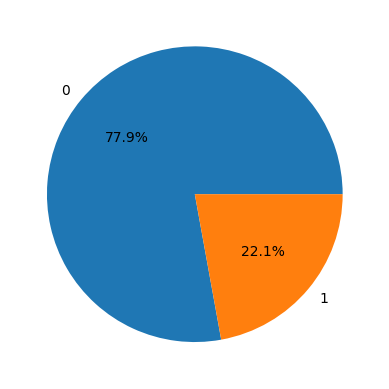

In [ ]:
fig, ax = plt.subplots()
ax.pie(df['FLAG'].value_counts(), labels=df['FLAG'].value_counts().index, autopct='%1.1f%%')

In [ ]:
#Looking for missing values

df.isnull().sum()

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [ ]:
df.dtypes

FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                                            float64
min value sent to contract              

In [ ]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [ ]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [ ]:
#Replace the missing values with average of the features

df.fillna(df.mean() , inplace = True)

In [ ]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [ ]:
# Filtering the features with 0 variance
no_var = df.var() == 0
dvar = df.var()[no_var]

In [ ]:
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [ ]:
# Drop features with 0 variance --- these features will not help in the performance of the model

df.drop(dvar.index, axis = 1, inplace = True)
print(df.var())

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [ ]:
df.shape

(9841, 39)

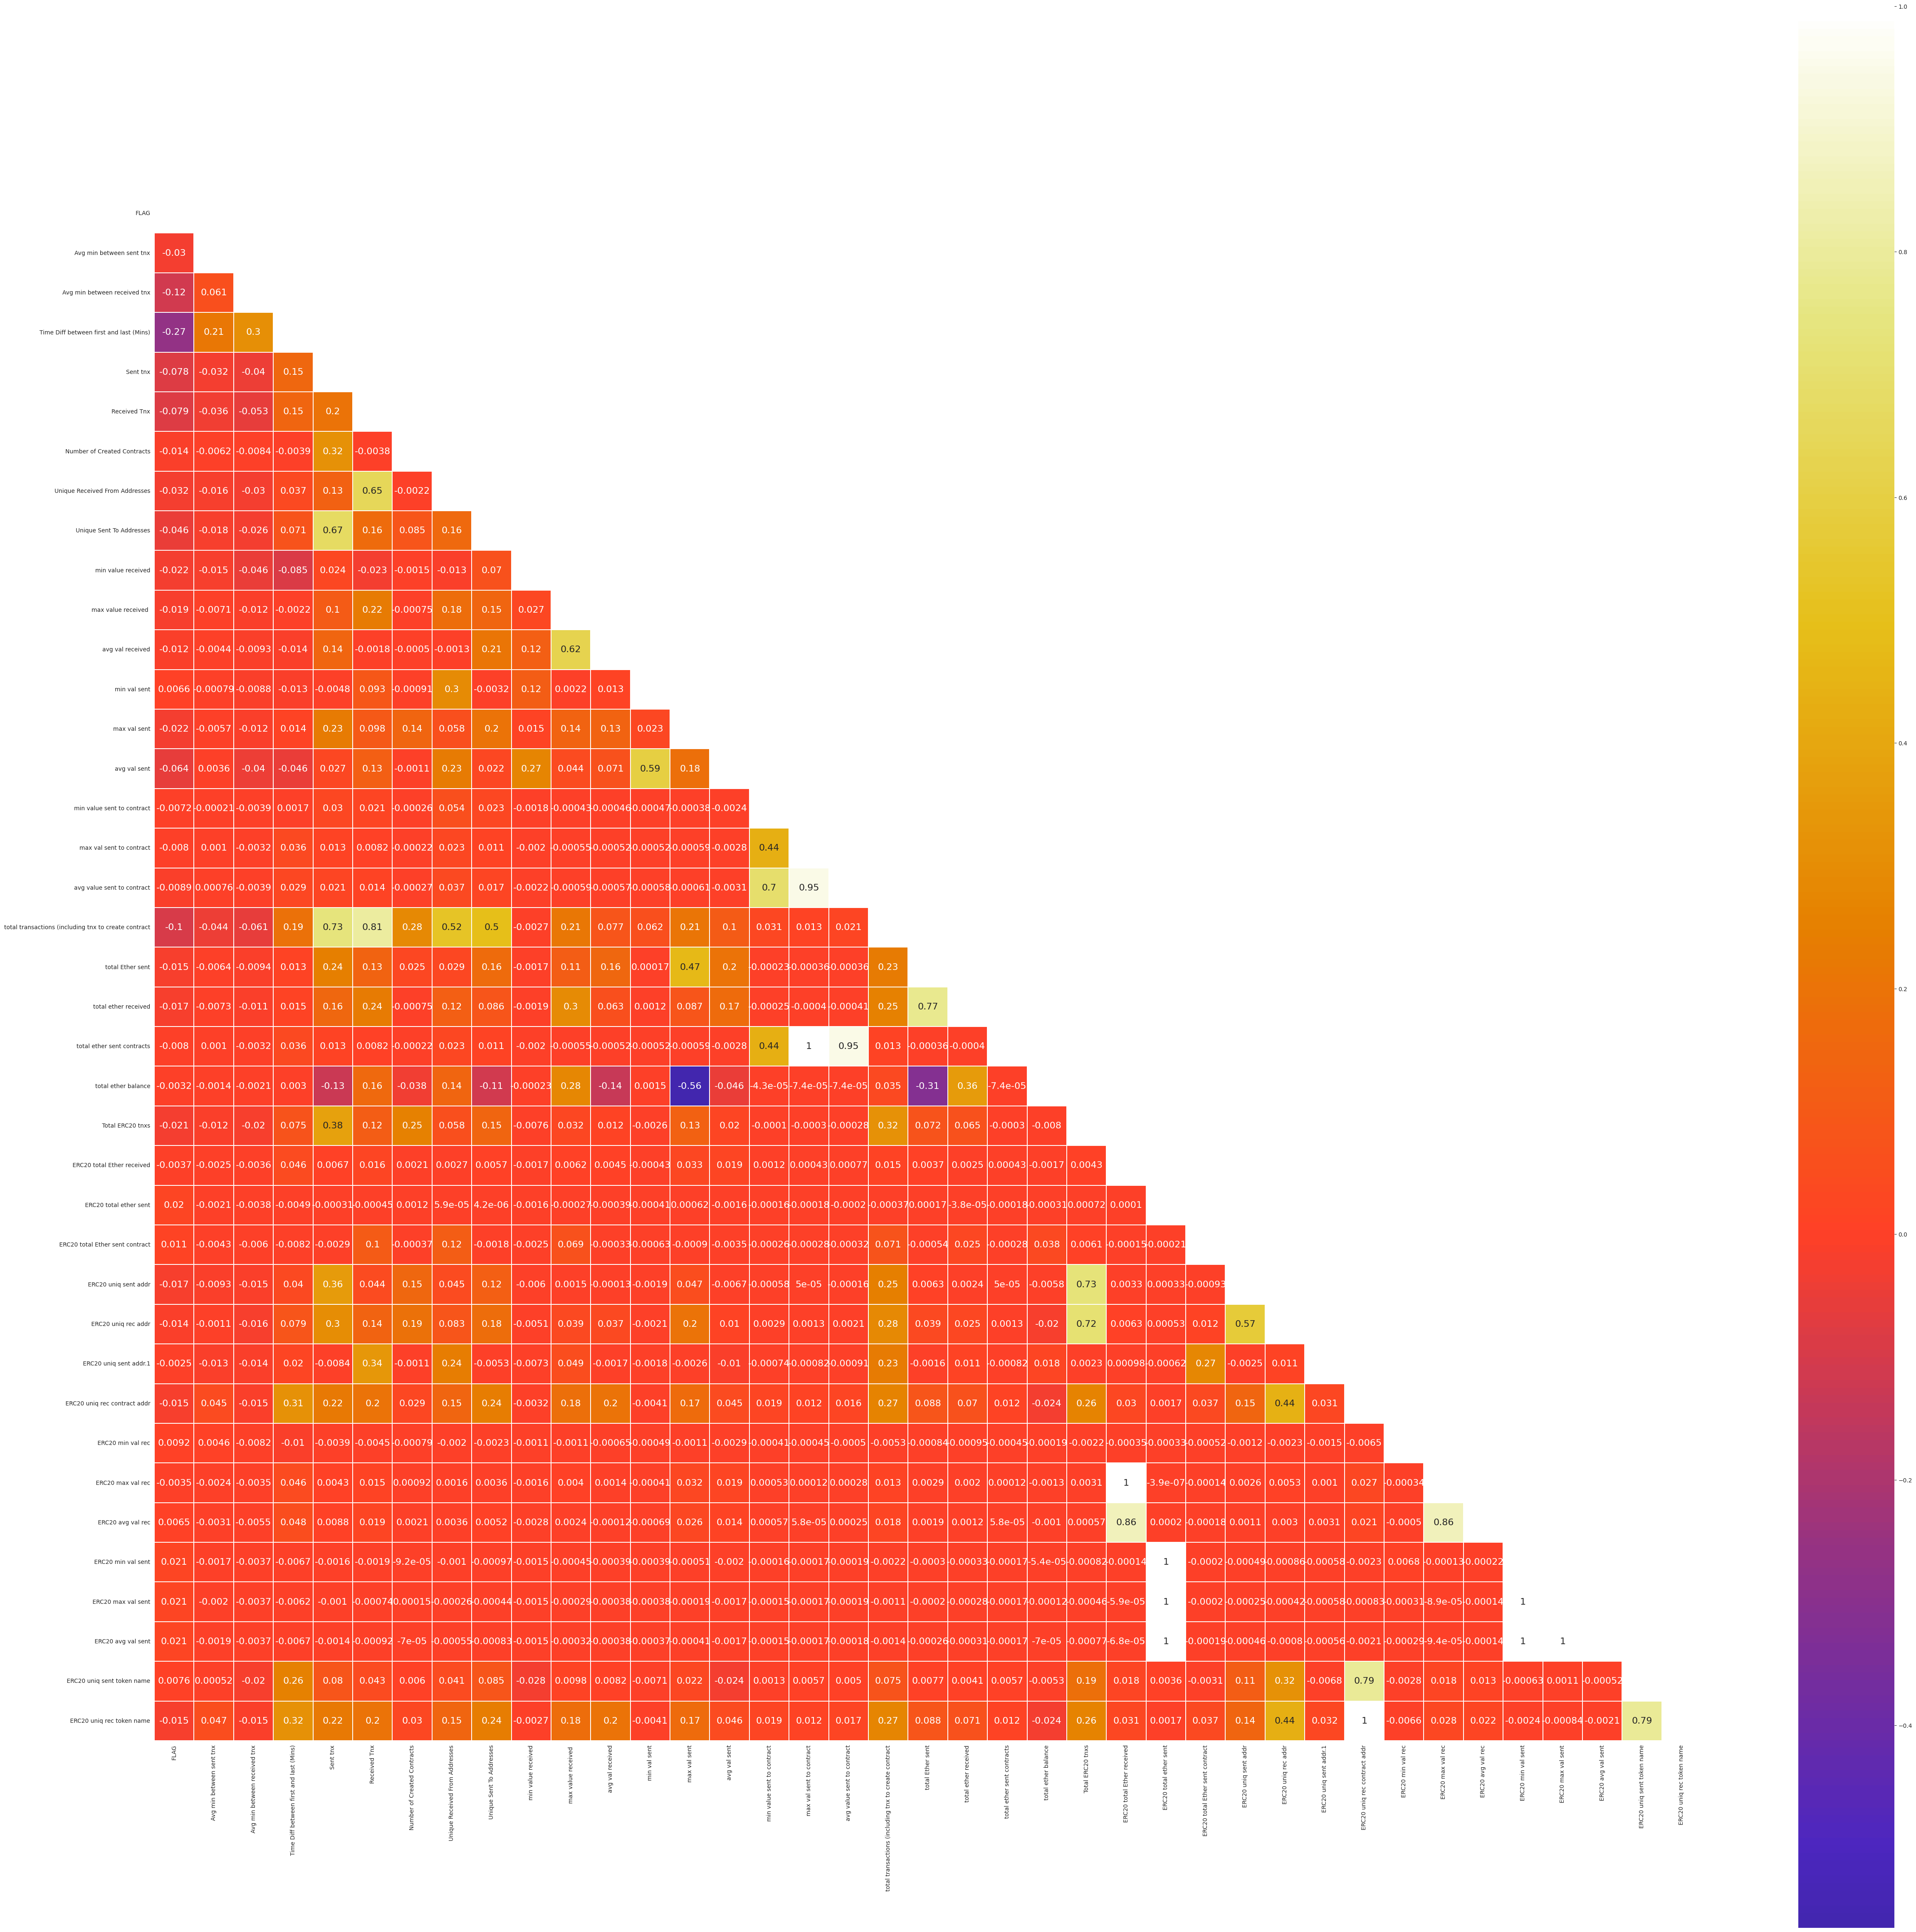

In [ ]:
#Correlation between features

corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [ ]:
# Sort the correlation

sorted_corr = corr.sort_values(by = 'FLAG' , key=abs)
sorted_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
ERC20 uniq sent addr.1,-0.002506,-0.012575,-0.014433,0.019606,-0.008370,0.337115,-0.001083,0.241391,-0.005343,-0.007272,...,1.000000,0.031444,-0.001494,9.987418e-04,0.003117,-0.000582,-0.000579,-0.000559,-0.006755,0.031637
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,...,0.018342,-0.023959,-0.000185,-1.257524e-03,-0.001001,-0.000054,-0.000118,-0.000070,-0.005284,-0.023985
ERC20 max val rec,-0.003548,-0.002421,-0.003481,0.045685,0.004287,0.015351,0.000920,0.001602,0.003597,-0.001649,...,0.000999,0.027431,-0.000340,1.000000e+00,0.859766,-0.000132,-0.000089,-0.000094,0.017572,0.028331
ERC20 total Ether received,-0.003681,-0.002506,-0.003590,0.045956,0.006676,0.016471,0.002072,0.002741,0.005707,-0.001705,...,0.000977,0.029870,-0.000352,9.999666e-01,0.859822,-0.000136,-0.000059,-0.000068,0.018168,0.030765
ERC20 avg val rec,0.006483,-0.003105,-0.005505,0.048148,0.008834,0.019091,0.002052,0.003590,0.005244,-0.002816,...,0.003117,0.021161,-0.000504,8.597655e-01,1.000000,-0.000224,-0.000135,-0.000141,0.013437,0.021930
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,...,-0.001816,-0.004107,-0.000490,-4.113011e-04,-0.000694,-0.000387,-0.000383,-0.000370,-0.007116,-0.004092
min value sent to contract,-0.007213,-0.000210,-0.003916,0.001734,0.029529,0.020645,-0.000261,0.053946,0.023183,-0.001820,...,-0.000740,0.018657,-0.000406,5.263944e-04,0.000573,-0.000157,-0.000148,-0.000147,0.001291,0.019074
ERC20 uniq sent token name,0.007608,0.000522,-0.019537,0.259245,0.079644,0.042604,0.006032,0.040656,0.084862,-0.028446,...,-0.006755,0.787126,-0.002791,1.757207e-02,0.013437,-0.000634,0.001087,-0.000518,1.000000,0.788401
max val sent to contract,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000820,0.012053,-0.000450,1.173766e-04,0.000058,-0.000174,-0.000169,-0.000165,0.005651,0.012411
total ether sent contracts,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000820,0.012053,-0.000450,1.173779e-04,0.000058,-0.000174,-0.000169,-0.000165,0.005651,0.012411


In [ ]:
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts',
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'avg value sent to contract',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

In [ ]:
df.shape

(9841, 19)

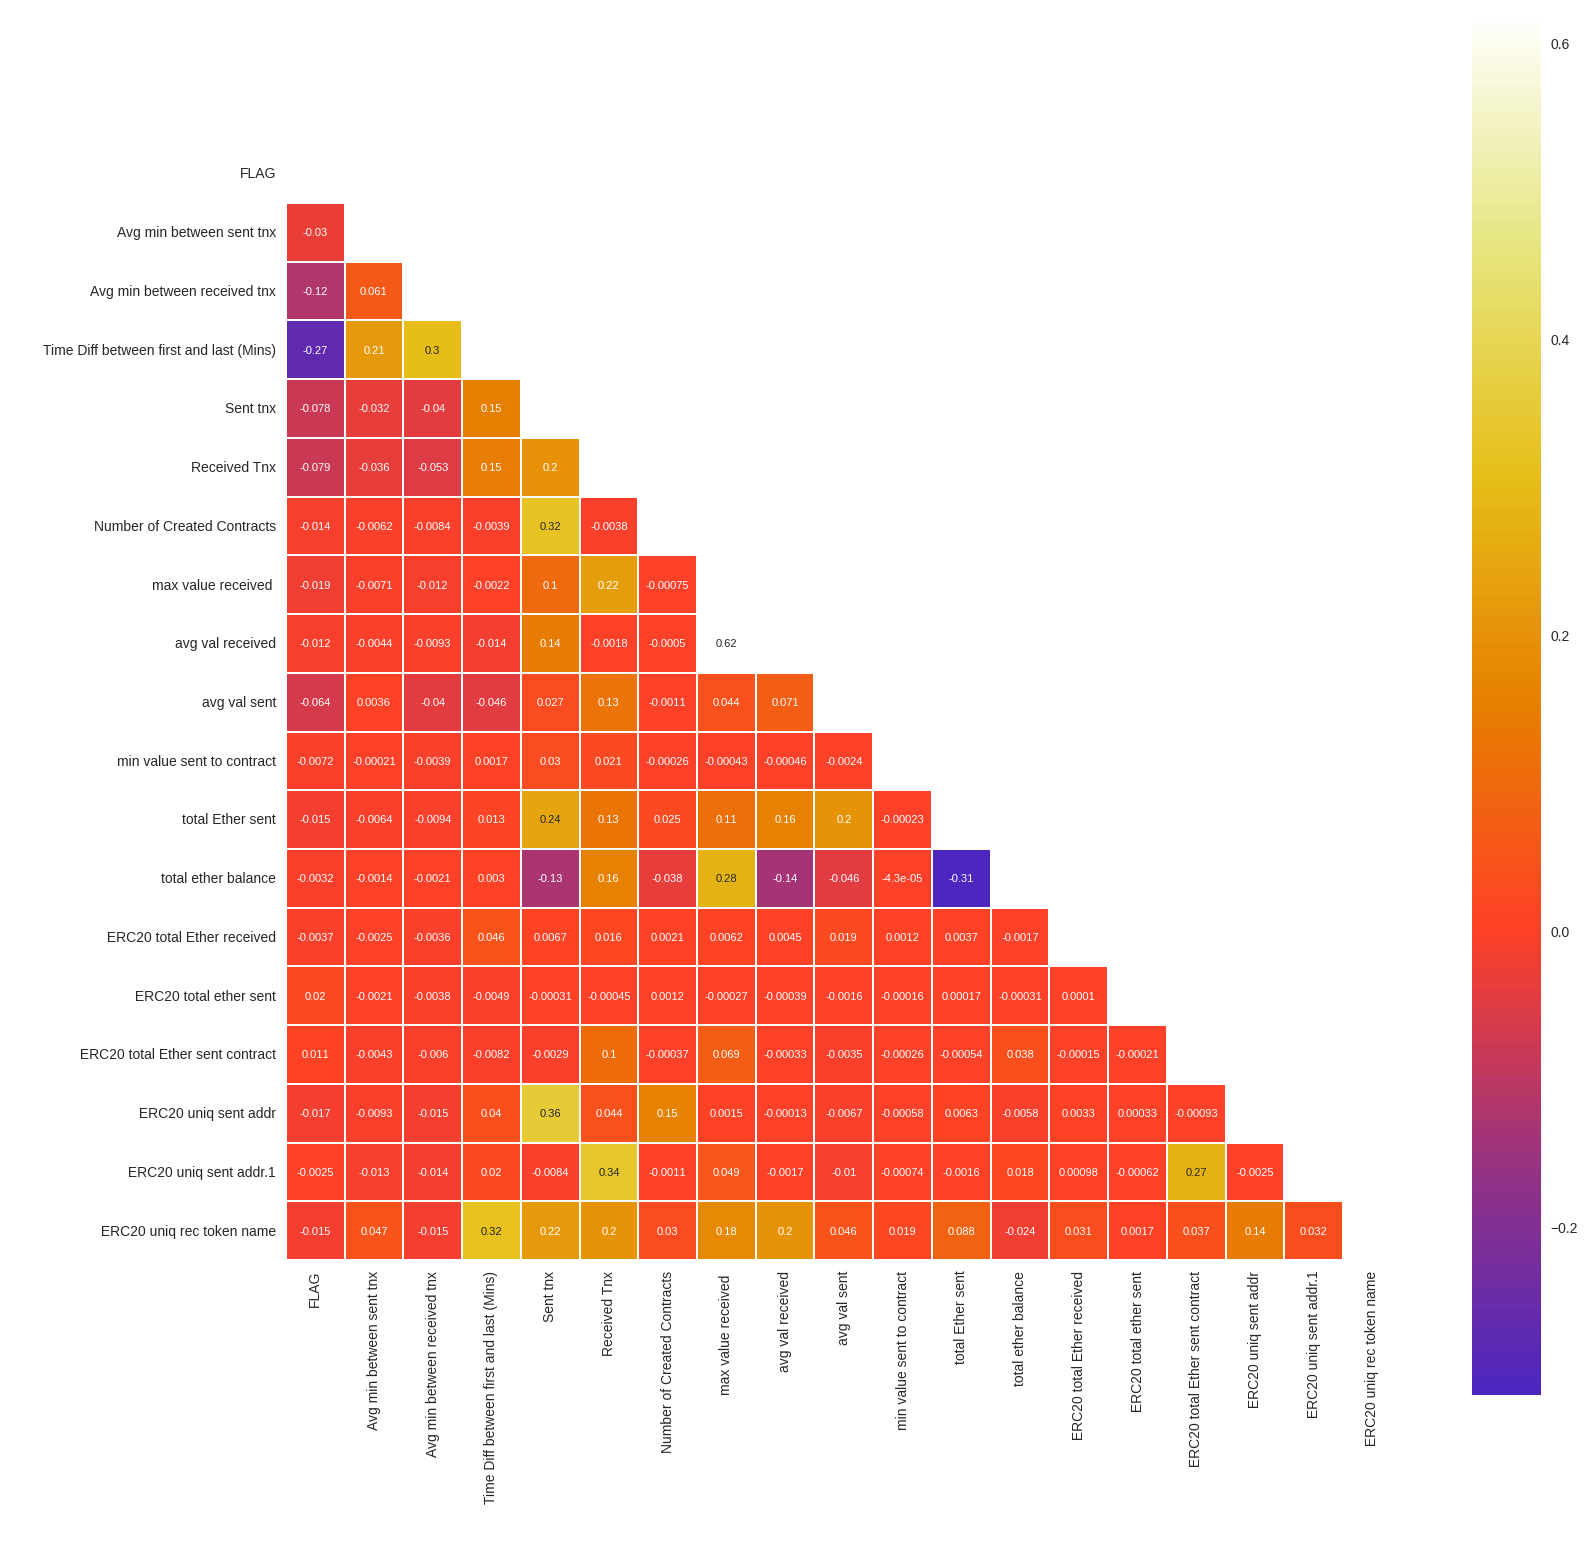

In [ ]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

In [ ]:
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

In [ ]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('===' * 10)

The column min value sent to contract has the following distribution: 
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
 ERC20 uniq sent addr.1
0.00000    8984
0.00344     829
1.00000      26
3.00000       1
2.00000       1
Name: count, dtype: int64


In [ ]:
droping_low_features = ['min value sent to contract' , ' ERC20 uniq sent addr.1']

df.drop(droping_low_features , axis = 1, inplace = True)

df.shape

(9841, 17)

##Train The Model

In [ ]:
X = df.drop('FLAG' , axis = 1)
y = df['FLAG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [ ]:
#Scale the data

sc = StandardScaler()
sc_train_fit = sc.fit_transform(X_train)

In [ ]:
#Make a DataFrame of scaled data

sc_df = pd.DataFrame(sc_train_fit, columns=X_train.columns)
sc_df.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.031784,-0.130116,-0.170156,-0.026374,-0.008354,-0.087246,-0.012786,-0.020698,0.120242,1.852886
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.043658,-0.183336,-0.209762,-0.028905,-0.007921,0.351254,-0.002066,-0.003778,0.004839,-0.002181
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.041094,-0.182633,-0.208458,-0.027951,-0.007905,-0.088587,-0.013052,-0.020698,-0.064660,-0.298927
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.043563,-0.182076,-0.209762,-0.028905,-0.007917,-0.088587,-0.013052,-0.020698,-0.064660,-0.298927
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.038450,-0.055912,0.027769,-0.028650,-0.007921,-0.088587,-0.013052,-0.020698,-0.064660,-0.298927


##Resampling

In [ ]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train_fit.shape, y_train.shape}')

Shape of the training before SMOTE: ((7872, 16), (7872,))


In [ ]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train_fit, y_train)

print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training after SMOTE: ((12230, 16), (12230,))


In [ ]:
print(f"Befor OverSampling   :{y_train.value_counts()}")
print("==" * 10)
print(f"After OverSampling   : {y_tr_resample.value_counts()}")

Befor OverSampling   :FLAG
0    6115
1    1757
Name: count, dtype: int64
After OverSampling   : FLAG
0    6115
1    6115
Name: count, dtype: int64


In [ ]:
# Transform test features
sc_test = sc.transform(X_test)

###Choose Best Model

In [ ]:
xgb_c = xgb.XGBClassifier(n_jobs = -1 ,random_state=45)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.96      0.97      0.96       422

    accuracy                           0.98      1969
   macro avg       0.97      0.98      0.98      1969
weighted avg       0.98      0.98      0.98      1969

[[1529   18]
 [  13  409]]


In [ ]:
#Finding the best hyperparameter for XGBoost

params_grid = {'learning_rate':[0.1, 0.3],
              'n_estimators':[200,300],
              'subsample':[0.5,0.9],
               'max_depth':[3,4],
               'colsample_bytree':[0.3,0.5, 0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

print("===" * 10)
print("===" * 10)

preds_best_xgb = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))


Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best recall obtained by the best params: 0.9882184461345915
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1522   25]
 [  16  406]]


In [ ]:
catboost = CatBoostClassifier()

catboost.fit(x_tr_resample,
          use_best_model=True,
          y=y_tr_resample)
catboost_pred = catboost.predict(sc_test)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.03001
0:	learn: 0.6358528	total: 59.4ms	remaining: 59.3s
1:	learn: 0.5798000	total: 68.4ms	remaining: 34.1s
2:	learn: 0.5378024	total: 77.1ms	remaining: 25.6s
3:	learn: 0.4986244	total: 85.6ms	remaining: 21.3s
4:	learn: 0.4691417	total: 94.1ms	remaining: 18.7s
5:	learn: 0.4343692	total: 103ms	remaining: 17s
6:	learn: 0.4021400	total: 111ms	remaining: 15.8s
7:	learn: 0.3788986	total: 120ms	remaining: 14.8s
8:	learn: 0.3595832	total: 129ms	remaining: 14.2s
9:	learn: 0.3394162	total: 137ms	remaining: 13.6s
10:	learn: 0.3221260	total: 146ms	remaining: 13.1s
11:	learn: 0.3052496	total: 155ms	remaining: 12.8s
12:	learn: 0.2923312	total: 166ms	remaining: 12.6s
13:	learn: 0.2811601	total: 176ms	remaining: 12.4s
14:	learn: 0.2692335	total: 184ms	remaining: 12.1s
15:	learn: 0.2590147	total: 193ms	remaining: 11.9s
16:	learn: 0.2493442	total: 208ms	remaining: 12s
17:	learn: 0.2390507	total: 217ms	remaining: 11.8s
18:	learn: 0.2310963	total: 226ms	remaining: 11.6s
19:	learn: 

In [ ]:
print(classification_report(y_test, catboost_pred))
print(confusion_matrix(y_test, catboost_pred))

In [ ]:
gnb = GaussianNB(random_state=65)

gnb.fit(x_tr_resample, y_tr_resample)
preds_gnb = gnb.predict(sc_test)

print(classification_report(y_test, preds_gnb))
print(confusion_matrix(y_test, preds_gnb))

              precision    recall  f1-score   support

           0       0.97      0.21      0.34      1547
           1       0.25      0.98      0.40       422

    accuracy                           0.37      1969
   macro avg       0.61      0.59      0.37      1969
weighted avg       0.82      0.37      0.35      1969

[[ 318 1229]
 [   9  413]]
